## Import data

In [253]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

path_to_file = 'train_titanic.csv'

titanic_data = pd.read_csv(path_to_file, index_col='PassengerId')

# Context

## What is titanic dataset about?

Titanic is a dataset that contains features about people who were on Titanic like age, port in which they were embarked, whether they survived the Titanic catastrophe and etc.

In [254]:
titanic_data.head(15)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
5,0,2,"Sassano, Jonathan",male,35.00,0,0,13363,6.71,NaN,S
6,0,3,"Conway, Jose",male,7.00,0,0,A/5,9.77,NaN,S
7,1,3,"Werner, Linda",female,6.00,1,2,434426,31.50,NaN,S
8,0,1,"Wardlaw, Michael",male,27.00,2,1,474849,73.02,A7253,S


## What is the unique id for each row of data?

Each row of data is identified by a 'PassengerId' column.

## Understanding the meaning of each variable

In [255]:
list(titanic_data.columns.values)

['Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

Those are the variables/features that we have

Let's understand the meaning of all features (variables) in the dataset:

'Survived' - whether a person survived the catastrophe or not, values 0 - dead and 1 - alive

'Pclass' - class of the cabin, can 1st, 2nd or 3rd

'Name' - name of the passenger, contains of First Name and Surname

'Sex' - sex of the passenger, can be 'male' or 'female'

'Age' - age of the person

'SibSp' - number of horizontal relatives (siblings and spouses) a person travelled with

'Parch' - number of vertical relatives (parents or children) a person travelled with

'Ticket' - an id of a ticket

'Fare' - amount of money person paid for a cabin

'Cabin' - number of a cabin, consists of a letter representing deck and a number

'Embarked' - name of the port in which person came on board of Titanic. Values are either 'C' - Cherbourg, 'S' - Southampton, or 'Q' - Queenstown

## Deck plan

Since column 'Cabin' contains values with letters, and letters represent decks on Titanic, I will leave here a plane of Titanic decks.

 ![Titanic Deck plan](titanic_deck_plan.jpg)

# Data quality assessment

## Number of raws and columnms

Let's check how many raws and columns the initial dataset has using shape method

In [256]:
titanic_data_shape = titanic_data.shape
titanic_data_shape

(100000, 11)

In other words, there are 100,000 raws and 11 columns with features (with index it would be 12 columns)

## Types of columns

Let's inspect data types of columns

In [257]:
titanic_data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [258]:
titanic_data.dtypes.value_counts()

object     5
int64      4
float64    2
dtype: int64

The dataset has 4 columns with integers, 2 columns with floats and 5 columns with object values.

## Categorizing features

Our features can be divided in 2 groups based on their datatypes:

1. Categorical features represent characteristics, and numbers can be used as values in them (for exampled, for a categorical feature 'Survived' dead means a number 0 and alive means a number 1 but we cannot add those numbers or calculate there mean.

There are 5 features with categorical data:
1. Survived
2. Pclass
3. Sex
4. Cabin
5. Embarked

A sub-class of categorical features are ordinal features. Ordinal features are the ones that can be ranked. In our case, ordinal feature is a 'Pclass' because 1st class is higher than 2nd, and 2nd is higher than 3rd.


2. Quantitative (numeric) features. It's data which values are exact numbers.

Quantitative data:
1. Age
2. Fare
3. SibSp
4. Parch

Moreover, quantitive data can be divided in continuos and discrete. Continuos can take any value in a range while discrete takes certain values. For example, age in our dataset has years and months, so it can take any value in a range between 0 and highest value of age possible.

Continuous values:
1. Age
2. Fare

Discrete values:
    
1. SibSp
2. Parch

## Feature Engineering

## Checking for duplicates

In [259]:
titanic_data.duplicated().value_counts()

False    100000
dtype: int64

There is no duplicated data in the dataset.

## Dealing with syntax errors and range constrains

There are certain ranges and logical values which certain variables can have. For example, age cannot be negative, fare cannot be negative and etc.

Let's check those ranges for each variable.

### Pclass

According to the internet, on Titanic there were only 3 classes of cabins: 1st, 2nd and 3rd. Let's check that this is really like this in our dataset.

In [260]:
titanic_data.Pclass.value_counts()

3    41006
1    30315
2    28679
Name: Pclass, dtype: int64

True, the data is within the range of discrete values.

### Sex

Let's check that sex is within a range of discrete values 'male' or 'female'.

In [261]:
titanic_data.Sex.value_counts()

male      56114
female    43886
Name: Sex, dtype: int64

True, the data is within the range of discrete values.

### Age

Let's check that age is bigger than 0 and less than 122 (the highest age that a person lived was 122 years).

In [262]:
titanic_data.loc[(titanic_data.Age <= 0) | (titanic_data.Age >= 122)].count()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

True, ages are bigger than 0 and lower than 122.

### SibSp

Let's check that SibSp is NOT a negative number since number of people cannot be negative.

In [263]:
titanic_data.loc[(titanic_data.SibSp < 0)].count()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

True, there are no negative values of SibSp.

### Parch

Let's check that Parch is NOT a negative number since number of people cannot be negative.

In [264]:
titanic_data.loc[(titanic_data.Parch < 0)].count()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

True, there are no negative values of Parch.

### Fare

Let's check that 'Fare' is NOT equal to negative number, 0 or too big number which would be impossible to pay.

In [265]:
titanic_data['Fare'].min(), titanic_data['Fare'].max()

(0.68, 744.66)

### Embarked

According to the internet, there were three ports (towns) from which people got on board of Titanic: 'S', 'Q', and 'C'. Let's check that this is really like this.

In [266]:
titanic_data.Embarked.value_counts()

S    72139
C    22187
Q     5424
Name: Embarked, dtype: int64

## Dealing with missing data

In [267]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  object 
 4   Age       96708 non-null   float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Ticket    95377 non-null   object 
 8   Fare      99866 non-null   float64
 9   Cabin     32134 non-null   object 
 10  Embarked  99750 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 9.2+ MB


In [268]:
count_nan = len(titanic_data) - titanic_data.count()
count_nan

Survived        0
Pclass          0
Name            0
Sex             0
Age          3292
SibSp           0
Parch           0
Ticket       4623
Fare          134
Cabin       67866
Embarked      250
dtype: int64

Columns 'Sirvived', 'Pclass', 'Sex','SibSp', 'Parch' have no missing values

Let's calculate percentage of missing data in columns that are left.

In [269]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns
missing_values_table(titanic_data)

There are 5 columns that have missing values.


,Missing Values,% of Total Values
Cabin,67866,67.9
Ticket,4623,4.6
Age,3292,3.3
Embarked,250,0.2
Fare,134,0.1


### Missing 'Cabin' data

'Cabin' column contains 67.9% of missing data, so it would be hard to impute there data without changing it significantly. The first thought would be to delete the column completely but as had been stated above Cabin is connected to Deck and Deck might have an assosiation with survival.

Instead, let's replace NaN with 'Not stated' for 'Cabin'.

In [270]:
titanic_data.Cabin = titanic_data.Cabin.fillna('Not stated')
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  object 
 4   Age       96708 non-null   float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Ticket    95377 non-null   object 
 8   Fare      99866 non-null   float64
 9   Cabin     100000 non-null  object 
 10  Embarked  99750 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 9.2+ MB


### Missing 'Ticket' data

According to articles about the tickets at the internet, people could have the same ticket number if they shared the same cabin. Moreover, tickets can be divided in different groups based on their pattern. For example, tickets that start with 'CA' were sold by the same seller, tickets that start with 'A' were sold by the same seller and etc.

Let's check it in our dataset by counting unique values.

In [271]:
titanic_data.Ticket.value_counts()

A/5             602
C.A.            177
SC/PARIS        145
SOTON/O.Q.       80
SC               57
               ... 
421812            1
PC 420601         1
PC 26800          1
STON/O 23755      1
458074            1
Name: Ticket, Length: 75331, dtype: int64

Logically, 602 people or 177 people couldn't share the same cabin. Moreover, information about sellers cannot influence other features. Consequently, ticket data cannot be used to draw correlation and should be deleted.

In [272]:
titanic_data = titanic_data.drop('Ticket', axis=1)
titanic_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,13.35,Not stated,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,71.29,Not stated,S
3,0,3,"Kramer, James",male,19.00,0,0,13.04,Not stated,S
4,1,3,"Bond, Michael",male,25.00,0,0,7.76,Not stated,S
...,...,...,...,...,...,...,...,...,...,...
99995,1,2,"Bell, Adele",female,62.00,0,0,14.86,D17243,C
99996,0,2,"Brown, Herman",male,66.00,0,0,11.15,Not stated,S
99997,0,3,"Childress, Charles",male,37.00,0,0,9.95,Not stated,S


### Missing 'Embarked' data

Embarked is a categorical data and has a loss of only 0.2% of data, so let's fill missing data with mode which is 'S'.

In [273]:
embarked_mode = titanic_data.Embarked.mode()[0]
titanic_data['Embarked'] = titanic_data['Embarked'].fillna(embarked_mode)
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  object 
 4   Age       96708 non-null   float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Fare      99866 non-null   float64
 8   Cabin     100000 non-null  object 
 9   Embarked  100000 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 8.4+ MB


### Missing 'Fare' data

Instead of just filling 'Fare' with mean, let's find correlation between fare mean and other features. Logically, the correlation that might exist is between 'Pclass' and 'Fare' mean because the higher the class, the higher should be price.

In [274]:
first_class_mean = titanic_data.loc[titanic_data.Pclass == 1].Fare.mean()
second_class_mean = titanic_data.loc[titanic_data.Pclass == 2].Fare.mean()
third_class_mean = titanic_data.loc[titanic_data.Pclass == 3].Fare.mean()
first_class_mean, second_class_mean, third_class_mean

(92.65311345995046, 25.756003422146332, 20.618226058504753)

True, the higher mean price, the higher cabin class.

Let's fill missing data in Fares for 1st class with mean for 1st class, for 2nd class with mean for 2nd class and etc. In this case, numbers that we fill will be more accurate because prices for classes of Cabins differ.

In [275]:
titanic_data['Fare'] = titanic_data.groupby('Pclass')['Fare'].transform(lambda group: group.fillna(group.mean()))
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  object 
 4   Age       96708 non-null   float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Fare      100000 non-null  float64
 8   Cabin     100000 non-null  object 
 9   Embarked  100000 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 8.4+ MB


### Missing 'Age' data

Instead of just filling data with median or mean, let's make more accurate filling of missing data. For that, let's try to find assosiations between age and other features.

Let's try to find a correlation between 'Age' and 'Pclass'.

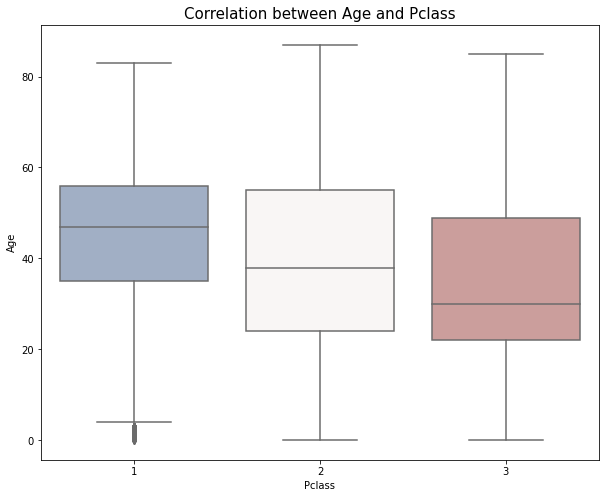

In [276]:
plt.figure(figsize=(10,8))
sns.boxplot(x="Pclass", y="Age", data=titanic_data, palette="vlag")
plt.title('Correlation between Age and Pclass', fontsize=15);

As seen above, the higher the Pclass the higher median age of a person. May be that is because older people could have earned more money during their life and riched higher job titles.

Let's try to find a correlation between 'Age' and 'Sex'.

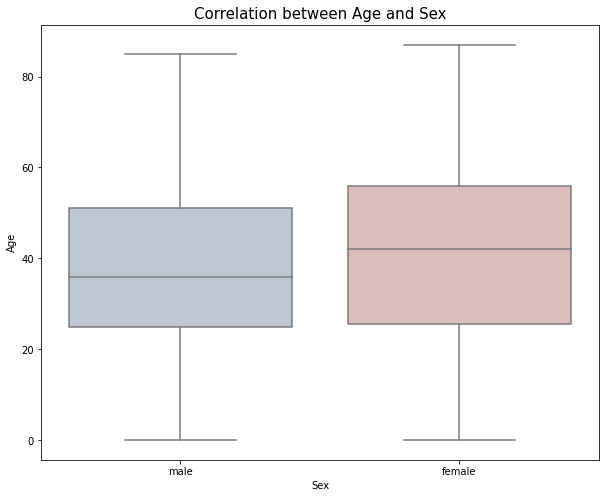

In [277]:
plt.figure(figsize=(10,8))
sns.boxplot(x="Sex", y="Age", data=titanic_data, palette="vlag")
plt.title('Correlation between Age and Sex', fontsize=15);

As seen above, females had a bigger median.

In [278]:
titanic_data['Age'] = titanic_data.groupby(['Pclass', 'Sex'])['Age'].transform(lambda group: group.fillna(group.median()))
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  object 
 4   Age       100000 non-null  float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Fare      100000 non-null  float64
 8   Cabin     100000 non-null  object 
 9   Embarked  100000 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 8.4+ MB


Now all of the missing values are either filled or deleted. Let's check how the shape of our dataset changed.

In [279]:
print(f"Rows left: {len(titanic_data)}, {titanic_data_shape[0] - len(titanic_data)} raws were deleted")

Rows left: 100000, 0 raws were deleted


In [280]:
print(f"Columns left: {titanic_data.shape[1]}, {titanic_data_shape[1] - titanic_data.shape[1]} columns were deleted")

Columns left: 10, 1 columns were deleted


## Ommiting unnessesary data (Name)

As seen below, names contain only First Name and Surname without any title or occupation, so there may not be any correlation between name and other features.

In [281]:
titanic_data.Name.value_counts().head(20)

Johnson, John        31
Smith, James         24
Smith, John          24
Johnson, William     22
Smith, Michael       20
Smith, William       19
Jones, James         19
Smith, Robert        18
Johnson, James       18
Smith, Mary          17
Johnson, Robert      16
Williams, Michael    15
Brown, John          15
Jones, William       15
Davis, Robert        15
Jones, Robert        15
Williams, Robert     14
Williams, John       14
Davis, John          14
Moore, David         14
Name: Name, dtype: int64

So let's delete it.

In [282]:
titanic_data = titanic_data.drop('Name', axis=1)
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
0,1,1,male,44.00,2,0,27.14,C12239,S
1,0,3,male,31.00,0,0,13.35,Not stated,S
2,0,3,male,0.33,1,2,71.29,Not stated,S
3,0,3,male,19.00,0,0,13.04,Not stated,S
4,1,3,male,25.00,0,0,7.76,Not stated,S
...,...,...,...,...,...,...,...,...,...
99995,1,2,female,62.00,0,0,14.86,D17243,C
99996,0,2,male,66.00,0,0,11.15,Not stated,S
99997,0,3,male,37.00,0,0,9.95,Not stated,S


## Outlier analysis (boxplots)

Let's find outliers in columns. It can be done using boxplots only with quantitative features like 'Age', 'SibSp', 'Parch', and 'Fare'.

### Age

Text(0.5, 1.0, 'Age')

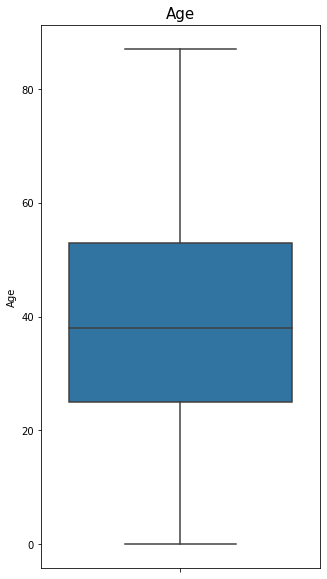

In [283]:
plt.figure(figsize=(5,10))
sns.boxplot(y="Age", data=titanic_data)
plt.title('Age', fontsize=15)

As we can see there are no outliers for 'Age'.

### SibSp

Text(0.5, 1.0, 'SibSp')

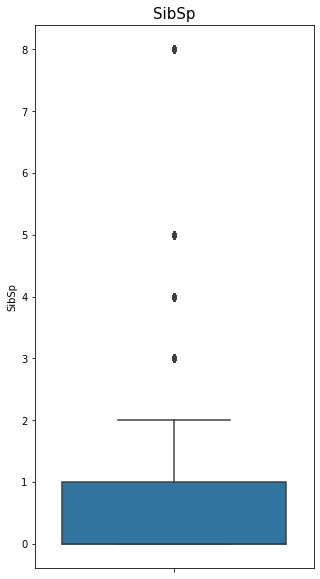

In [284]:
plt.figure(figsize=(5,10))
sns.boxplot(y="SibSp", data=titanic_data)
plt.title('SibSp', fontsize=15)

Boxplot shows outliers but they don't hurt the results because there can logically be 8 siblings and a wife / a husband, so we will let them be.

### Parch

Text(0.5, 1.0, 'Parch')

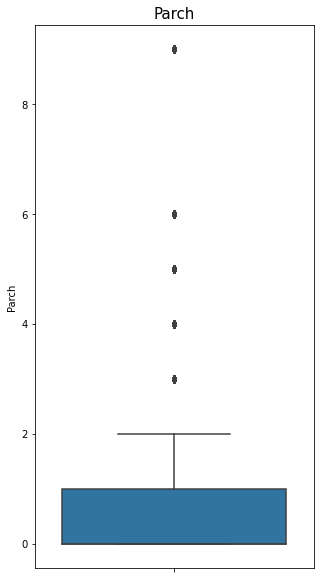

In [285]:
plt.figure(figsize=(5,10))
sns.boxplot(y="Parch", data=titanic_data)
plt.title('Parch', fontsize=15)

Boxplot shows outliers but they don't hurt the results because there can logically be so many parents and children together, so we will let them be.

### Fare

Text(0.5, 1.0, 'Fare')

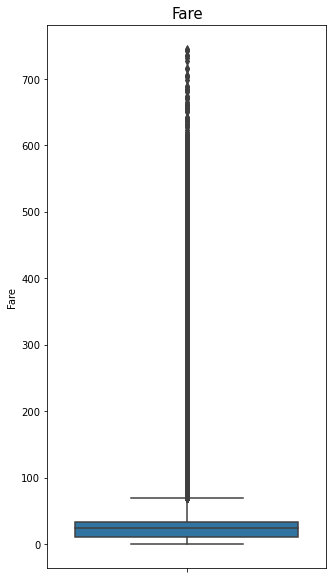

In [286]:
plt.figure(figsize=(5,10))
sns.boxplot(y="Fare", data=titanic_data)
plt.title('Fare', fontsize=15)

Let's check whether those outliers mild or extreme.

In [287]:
Q1 = titanic_data['Fare'].quantile(0.25)
Q3 = titanic_data['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_lim_mild = Q1 - 1.5 * IQR
upper_lim_mild = Q3 + 1.5 * IQR
lower_lim_extreme = Q1 - 3 * IQR
upper_lim_extreme = Q3 + 3 * IQR
lower_lim_mild, upper_lim_mild

(-25.15, 68.69)

In [288]:
lower_lim_extreme, upper_lim_extreme

(-60.339999999999996, 103.88)

In [289]:
titanic_data[titanic_data['Fare'] < lower_lim_mild]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,


As we can see there is no mild and consequently extreme outliers that are below lower limit.

In [290]:
titanic_data[(titanic_data['Fare'] > upper_lim_mild) & (titanic_data['Fare'] < upper_lim_extreme)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
2,0,3,male,0.33,1,2,71.29,Not stated,S
8,0,1,male,27.00,2,1,73.02,A7253,S
25,0,1,female,53.00,1,1,82.57,B11790,Q
33,1,1,female,67.00,1,0,97.20,B16390,Q
50,1,1,male,63.00,0,0,80.11,C12615,C
...,...,...,...,...,...,...,...,...,...
99934,1,1,male,51.00,0,0,70.55,B9505,S
99935,1,2,male,30.00,0,0,75.60,D12752,C
99941,1,1,female,49.00,0,0,86.32,C3291,Q


In [291]:
len(titanic_data[(titanic_data['Fare'] > upper_lim_mild) & (titanic_data['Fare'] < upper_lim_extreme)])

7788

There are 7788 mild outliers that are higher than upper mild limit.

In [292]:
titanic_data[(titanic_data['Fare'] > upper_lim_extreme)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
19,1,1,female,61.0,0,4,205.01,B7010,Q
27,1,1,female,35.0,0,2,154.61,C20297,C
37,1,1,male,54.0,0,0,228.82,B7665,S
40,1,1,female,69.0,1,0,116.65,D6224,Q
63,0,1,female,36.0,0,2,473.49,A6932,C
...,...,...,...,...,...,...,...,...,...
99946,1,1,female,62.0,0,0,209.06,C4196,C
99949,1,1,female,49.0,1,1,148.73,B15425,S
99960,1,1,male,20.0,0,4,271.78,B3911,S


In [293]:
len(titanic_data[(titanic_data['Fare'] > upper_lim_extreme)])

9413

And there are 9413 extreme outliers that are higher than upper extreme limit.

In total there are 17201 outliers.

Those outliers can be due to mistakes in gathering data but as we know the data is syntatic. Moreover, in real world big prices for cabincs can be due to people who buy tickets and resell them to other people for higher price (resellers).

Consequently, we will not delete the outliers.

However, let's look how those outliers distribute between Pclasses and Embarked.

'Fare' contains outliers, let's check whether they differ by classes of cabins.

Text(0.5, 1.0, 'Fare')

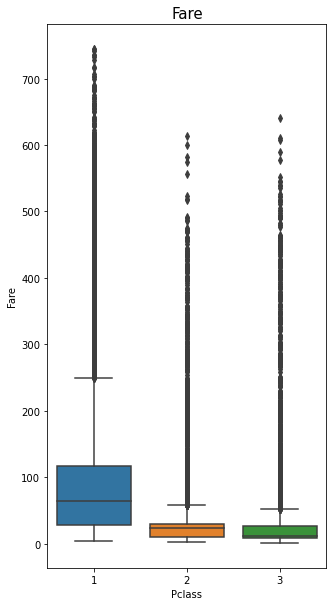

In [294]:
plt.figure(figsize=(5,10))
sns.boxplot(x='Pclass', y="Fare", data=titanic_data)
plt.title('Fare', fontsize=15)

## Pre-Summary we can make based on Data Quality Assestment

Even at the stage of Data Quality assesment we can make certain conclusions about the dataset:

- dataset contains categorical, ordinal and numerical values
- dataset has no duplicates
- all values but Fare are within logical ranges. Fare feature has around 17000 outliers including extreme outliers
- the largest amount of missing values had 'Cabin' feature (around 70%). All missing values has been either replaced or deleted.
- Fare contains outliers but they can be due to resell of tickets which highered price
- Pclass has a correlation with Fare. Mean Fare is higher when Pclass is more prestigious.
- Pclass has a correlation with Age. Older people tend to buy Cabins with higher Pclass.
- Female median age is higher than Male median age

# Data exploration

## Vizualization and summary statistics for each variable

### 'Survived' column

As 'Survived' column is a category data there is no use in describe() method. 

Let's see the distribution of values using other ways.

In [295]:
titanic_data.Survived.value_counts()

0    57226
1    42774
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Distribution of Survived by categories')

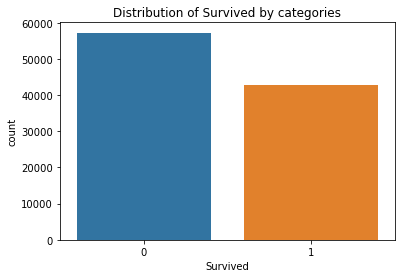

In [296]:
sns.countplot(x="Survived",data=titanic_data)
plt.title('Distribution of Survived by categories')

We can already make the conclusion that more people didn't survive than survived.

In [297]:
print(f"Precisely, {100*titanic_data.Survived.value_counts()[0]/len(titanic_data)}% didn't survived and {100*titanic_data.Survived.value_counts()[1]/len(titanic_data)}% survived")

Precisely, 57.226% didn't survived and 42.774% survived


### 'Pclass' column

Let's examine 'Pclass' column with categorical data closer.

In [298]:
titanic_data.Pclass.value_counts()

3    41006
1    30315
2    28679
Name: Pclass, dtype: int64

Text(0.5, 1.0, 'Distribution of Pclass by categories')

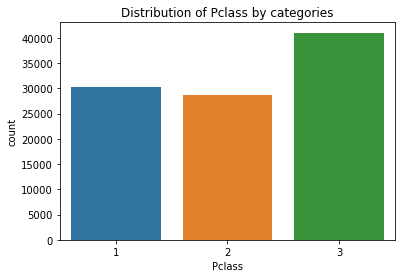

In [299]:
sns.countplot(x="Pclass",data=titanic_data)
plt.title('Distribution of Pclass by categories')

To conclude, the most people had 3rd class cabin, than 1st, than 2nd.

In [300]:
print(f"Precisely, {100*titanic_data.Pclass.value_counts()[1]/len(titanic_data)}% had 1st class cabin, {100*titanic_data.Pclass.value_counts()[2]/len(titanic_data)}% had 2nd class cabin and {100*titanic_data.Pclass.value_counts()[3]/len(titanic_data)}% had third class cabin")

Precisely, 30.315% had 1st class cabin, 28.679% had 2nd class cabin and 41.006% had third class cabin


### 'Sex' column

Let's examine 'Sex' column with categorical data closer.

In [301]:
titanic_data.Sex.value_counts()

male      56114
female    43886
Name: Sex, dtype: int64

Text(0.5, 1.0, 'Distribution of Sex by categories')

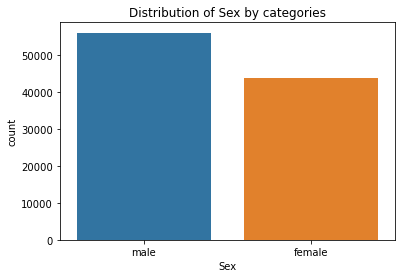

In [302]:
sns.countplot(x='Sex', data=titanic_data)
plt.title('Distribution of Sex by categories')

To conclude, there were more male on board than female.

In [303]:
print(f"Precisely, {100*titanic_data.Sex.value_counts()[0]/len(titanic_data)}% were male and {100*titanic_data.Sex.value_counts()[1]/len(titanic_data)}% were female")

Precisely, 56.114% were male and 43.886% were female


### Age

Age is numerical, so let's approach it with describe.

In [304]:
titanic_data.Age.describe()

count    100000.000000
mean         38.322220
std          18.056228
min           0.080000
25%          25.000000
50%          38.000000
75%          53.000000
max          87.000000
Name: Age, dtype: float64

D:\MiniConda\envs\rsschool-machine-learning-course\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

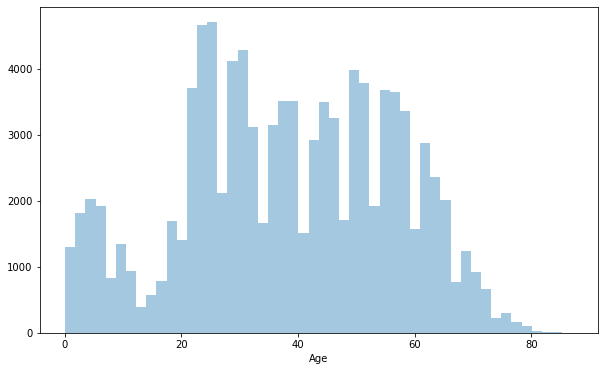

In [305]:
plt.figure(figsize=(10, 6))
sns.distplot(a=titanic_data['Age'], kde=False)

To conclude median is 38, mean is roughly the same as median. Minimum value is 0.08 years and maximum is 87 years. People's ages are concentrated between 20 and 40 years old.

### SibSp

Although we assigned SibSp to be numerical, it's between numerical and categorical, and has discrete values, so we will examine it as categorical value.

In [306]:
titanic_data.SibSp.value_counts()

0    73308
1    19758
2     3703
3     1635
4     1168
8      296
5      132
Name: SibSp, dtype: int64

Text(0.5, 1.0, 'Distribution of SibSp between categories')

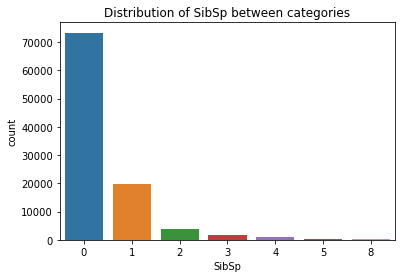

In [307]:
sns.countplot(x='SibSp', data=titanic_data)
plt.title('Distribution of SibSp between categories')

Let's calculate amount of SibSp values in percent.

In [308]:
titanic_data.SibSp.value_counts(normalize=True).map(lambda x: x * 100)

0    73.308
1    19.758
2     3.703
3     1.635
4     1.168
8     0.296
5     0.132
Name: SibSp, dtype: float64

To conclude, around 73% had no siblings or spouces on board, around 20% had 1 sibling or spouce on board and etc.

### Parch

Although we assigned Parch to be numerical, it's between numerical and categorical, and has discrete values, so we will examine it as categorical value.

Text(0.5, 1.0, 'Distribution of Parch between categories')

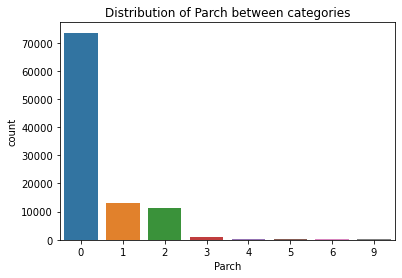

In [309]:
sns.countplot(x='Parch', data=titanic_data)
plt.title('Distribution of Parch between categories')

In [310]:
titanic_data.Parch.value_counts()

0    73540
1    12996
2    11236
3      983
4      446
5      331
9      264
6      204
Name: Parch, dtype: int64

Text(0.5, 1.0, 'Distribution of Parch between categories')

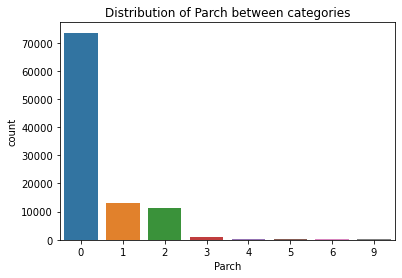

In [311]:
sns.countplot(x='Parch', data=titanic_data)
plt.title('Distribution of Parch between categories')

Let's calculate amount of Parch values in percent.

In [312]:
titanic_data.Parch.value_counts(normalize=True).map(lambda x: x * 100)

0    73.540
1    12.996
2    11.236
3     0.983
4     0.446
5     0.331
9     0.264
6     0.204
Name: Parch, dtype: float64

To conclude, around 73% had 0 parent or child on board, around 12% had 1 parent or child on board, around 11% had 1 parent or child on board.

### Fare

Fare like Age is numerical, so we can use histogram and describe method for it.

In [313]:
titanic_data.Fare.describe()

count    100000.000000
mean         43.929065
std          69.552036
min           0.680000
25%          10.040000
50%          24.470000
75%          33.500000
max         744.660000
Name: Fare, dtype: float64

D:\MiniConda\envs\rsschool-machine-learning-course\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare'>

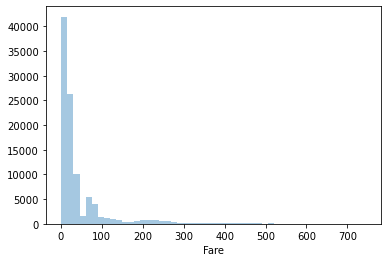

In [314]:
sns.distplot(a=titanic_data.Fare, kde=False)

To conclude, mean is around 43.92, median is 24.47, min value is around 0.68 and max value is around 744.6, 75% percent of the values are below 33.5.

### Cabin

Cabin data is categorical, but as seen below it has 26993 categories, so there is no much to say in term of memorazing.

In [315]:
titanic_data.Cabin.value_counts()

Not stated    67866
C19828            6
B18148            5
C9767             5
A9127             5
              ...  
C7208             1
A5788             1
C5607             1
D14672            1
D17243            1
Name: Cabin, Length: 26993, dtype: int64

To conclude, the most popular value is 'Not stated', others values popularity differs between 1 and 6.

### Embarked

Let's examine 'Embarked' column with categorical data closer.

In [316]:
titanic_data.Embarked.value_counts()

S    72389
C    22187
Q     5424
Name: Embarked, dtype: int64

Text(0.5, 1.0, 'Distribution of Embarked by categories')

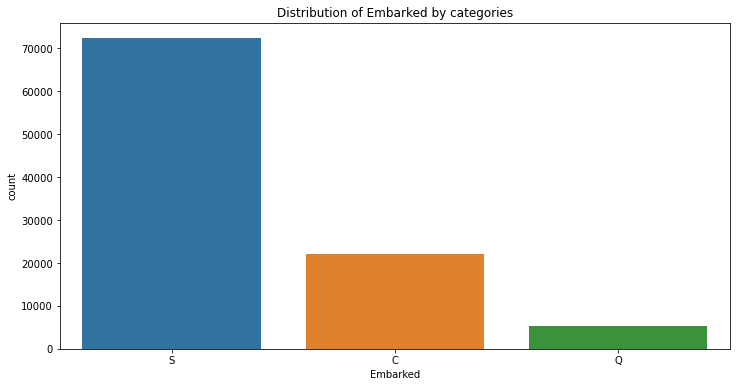

In [317]:
plt.figure(figsize=(12,6))
sns.countplot(x='Embarked', data=titanic_data)
plt.title('Distribution of Embarked by categories')

In [318]:
print(f"To conclude, {100*titanic_data.Embarked.value_counts()[0]/len(titanic_data)}% of passangers came from 'S' port, {100*titanic_data.Embarked.value_counts()[1]/len(titanic_data)}% of people came from 'C' port and {100*titanic_data.Embarked.value_counts()[2]/len(titanic_data)}% of people came from 'Q' port")

To conclude, 72.389% of passangers came from 'S' port, 22.187% of people came from 'C' port and 5.424% of people came from 'Q' port


## Assert relationships

### Target feature 'Survived'

Let's start with finding relationships between 'Survived' feature and others.

### Survived and Age

Hypothetically, age can matter because adolescents and young adults can swim better and are more resistant than too young children or old people. Let's check it.

Also, the Captain of Titanic prioritized placing children and women in lifeboats, so kids could have higher chances to survive.

Text(0.5, 1.0, 'Fare')

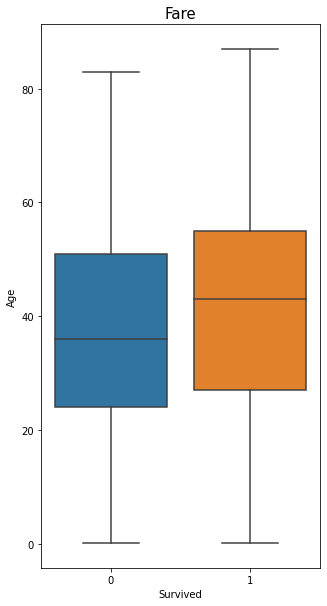

In [319]:
plt.figure(figsize=(5,10))
sns.boxplot(x='Survived', y="Age", data=titanic_data)
plt.title('Fare', fontsize=15)

In [320]:
titanic_data.groupby('Survived').Age.describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,57226.0,36.665654,17.543936,0.08,24.0,36.0,51.0,83.0
1,42774.0,40.538487,18.489222,0.08,27.0,43.0,55.0,87.0


As seen by the graph and table, mean age for those who stayed alive is 40 and median is 43, while mean age for those who did NOT survive is 36 and mmedian is 36. Moreover, 25% percentile of age for those who didn't survive is slightly lower.

It shows that the hypothesis that young adults and adolescents had more changes to survive because of their physical strength is False. In fact, ages of those who survived and didn't survive are close and even old people as 87 years old survived.

### Survived and Sex

As was said above the Captain ordered to save women first, so we can propose that women survival rate must be significantly higher.

<AxesSubplot:xlabel='Sex'>

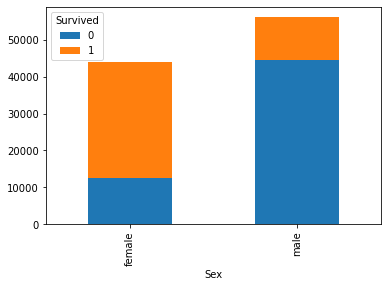

In [323]:
df2 = titanic_data.groupby(['Sex', 'Survived'])['Sex'].count().unstack('Survived')
df2[[0, 1]].plot(kind='bar', stacked=True)

True, women chances to survive are significantly higher.

### Survived and Pclass, Deck

According to the internet, spaces for people in 3rd class were isolated from people in 1st class and 2nd class, and crew forgot about opening some of those bars separating people form 3rd class from others. 

Moreover, 3rd class cabins were on lower decks and their passengers had to come upstairs and could, for instance, drawn through doing so, be blocked by some obstacles or come later to the lifeboats.

Hypothetically, there should be a big difference in survival between people in 3rd class and lower decks and others. 

According to the intertnet,

A Deck had cabins of First Class

B Deck had cabins of First Class

C Deck had cabins of First Class, Second class

D Deck had cabins of First Class, Second class, Third class

E Deck had cabins of First Class, Second class, Third class

F Deck had cabins of Second class, Third class

G Deck had no cabins


<AxesSubplot:xlabel='Pclass'>

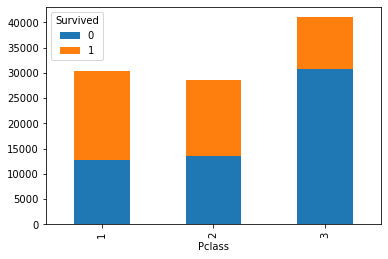

In [321]:
df2 = titanic_data.groupby(['Pclass', 'Survived'])['Pclass'].count().unstack('Survived')
df2[[0, 1]].plot(kind='bar', stacked=True)

True, the higher the class of a cabin, the more chances a person had to survive. Moreover, there is a big difference between survival of 3rd class passengers and other classes passengers.

In [325]:
df2 = titanic_data.groupby(['Deck', 'Survived'])['Deck'].count().unstack('Survived')
df2[[0, 1]].plot(kind='bar', stacked=True) ???

SyntaxError: invalid syntax (Temp/ipykernel_10504/2435107379.py, line 2)

### Survived, pclass, age and sex ???

In [ ]:
As we have seen there is no logical correlation between 

### Survived and SibSp

Assuming about relathionship of Survived and SibSp is interesting because of so small info we have about SibSp. In fact, we know only amount of Siblings/Spouses but we cannot match people and their siblings and see what age, sex and etc. their Siblins/Spauses had. With info about relationships we found above we could speculate.

For example, we could say that if a person has a sister, he might sacrifise his spot on a lifeboat for her and etc. But we don't have this data, so let's not speculate and just see info that graphs show us.

<AxesSubplot:xlabel='SibSp'>

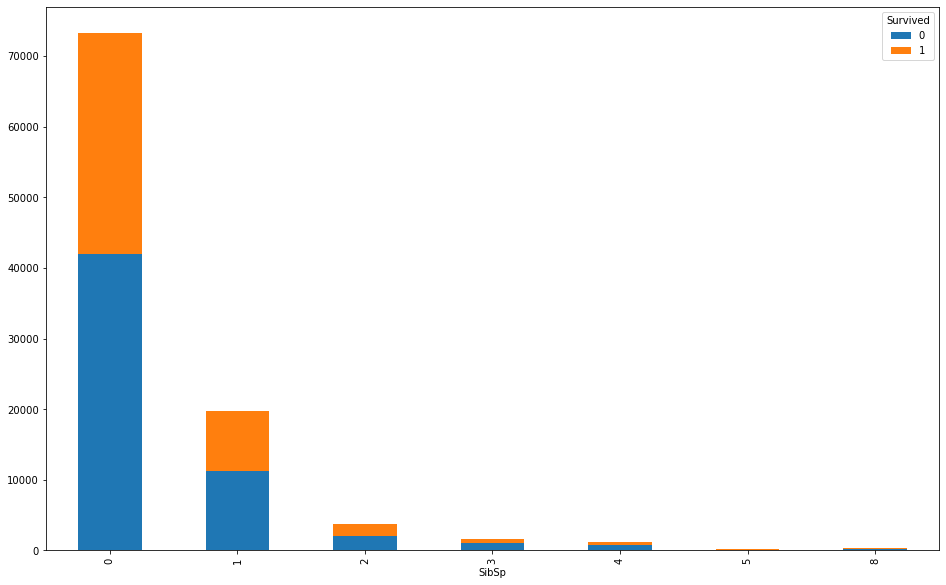

In [335]:
df2 = titanic_data.groupby(['SibSp', 'Survived'])['SibSp'].count().unstack('Survived')
df2[[0, 1]].plot(kind='bar', stacked=True, figsize=(16, 10))

As we can see people who had 0 SibSp had a slightly smaller chance of Survival. When a person had at least 1 SibSp they had almost 50%/50% chance of survival. Maybe that's because relatives helped each other.

### Survived and Parch

I will not make any speculations about this relatioship before seeing graphs using logic from 'Survived and SibSp'.

<AxesSubplot:xlabel='Parch'>

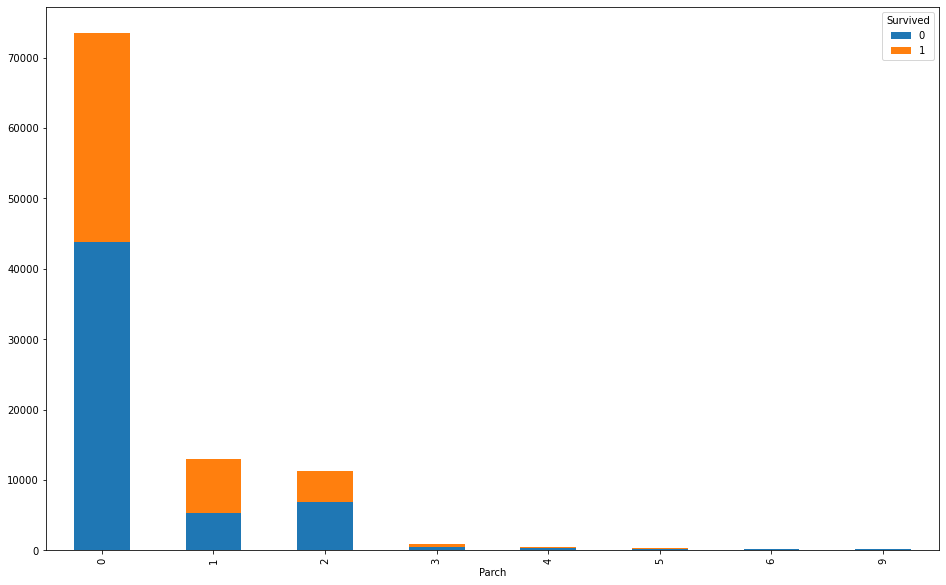

In [337]:
df2 = titanic_data.groupby(['Parch', 'Survived'])['Parch'].count().unstack('Survived')
df2[[0, 1]].plot(kind='bar', stacked=True, figsize=(16, 10))

As we can see people who had 0 Parch had a slightly smaller chance of Survival. When a person had at least 1 Parch they had almost 50%/50% chance of survival. Maybe that's because relatives helped each other.

### Survived and Embarked

There is a very small change that port city could influence Survival because all of this cities are ports relatively in the same area (France, England and Ireland), and a lot of people who came on board of Titanic there could be living in different cities.

<AxesSubplot:xlabel='Embarked'>

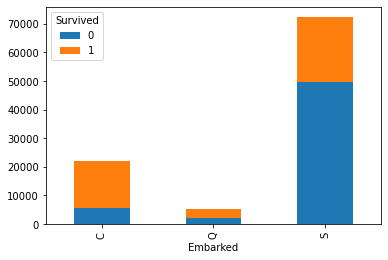

In [322]:
df2 = titanic_data.groupby(['Embarked', 'Survived'])['Pclass'].count().unstack('Survived')
df2[[0, 1]].plot(kind='bar', stacked=True)

As we can see there is a difference in survival between ports. But it can be caused by other factors.

## Target feature Pclass

### Pclass and Age

As we have already proved in Data Quality assesment, the older the person, the more chance that they have a higher Pclass.

### Pclass and Sex

### Pclass and Price

    класс каюты и порт (проверим в выжимаемости)

пол и возраст (проверено)

пол и кол-во родственников

    пол и порт (проверим в выжимаемости

пол и палуба


возраст и родственники

    возраст и порт (проверим в выжимаемости

## Target feature Fare

### Fare and Age

Following modern world logic hypothetically tickets for children and seniors could be lower in price. However, there is no info on the internet telling that tickets were divided into tickets for children, adults, and seniors, so we shouldn't think this way.

<AxesSubplot:xlabel='Fare', ylabel='Age'>

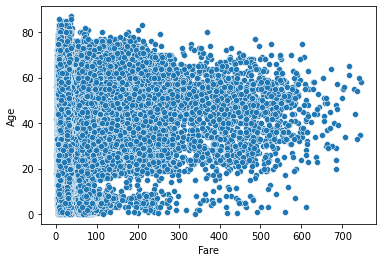

In [341]:
sns.scatterplot(x=titanic_data['Fare'], y=titanic_data['Age'])

As we can see there is no clear relationship between Age and Fare. For example, people whose age below 20 could have fare from around 0 to around 600, and etc.

To underline, the highest Fare tended to have middle aged people.

### Fare and Sex

As said above, tickets were not divided into categories, so we can assume that Fare was distributed equally between sexes.

Text(0.5, 1.0, 'Fare and Sex')

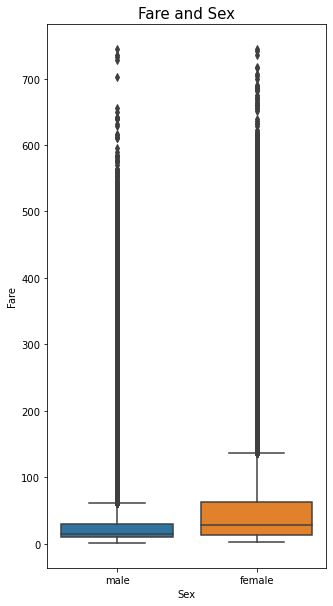

In [346]:
plt.figure(figsize=(5,10))
sns.boxplot(x='Sex', y="Fare", data=titanic_data)
plt.title('Fare and Sex', fontsize=15)

In [347]:
titanic_data.groupby('Sex').Fare.describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,43886.0,55.214484,79.238188,1.61,12.58,28.31,62.10,744.46
male,56114.0,35.102892,59.438364,0.68,9.13,13.62,29.94,744.66


Women tended to have higher fares.

### Fare and Pclass

# Summary

теория про борты